In [1]:
import numpy as np
import os, sys

# project_root = os.getcwd()
project_root = os.path.abspath("")
if project_root[-12:] == 'LyoSavin2023':
    base_dir = project_root
else:
    base_dir = os.path.dirname(project_root)
sys.path.append(os.path.join(base_dir, 'core'))
sys.path.append(os.path.join(base_dir, 'core/utils'))

import torch
from tqdm.auto import tqdm, trange
import matplotlib.pyplot as plt

from utils import remove_all_ticks_and_labels
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42  # makes fonts editable in Adobe Illustrator
matplotlib.rcParams['ps.fonttype'] = 42

device = 'cpu'

In [12]:
from utils import select_model, load_model_weights
from models import SNN
from prior_utils import forward_process

num_steps = 100
num_hidden = 42
betas = forward_process(num_steps, device)[0]
model = SNN(num_hidden, betas)
model = load_model_weights(model, 'snn3', 2, device)

model loaded!


torch.Size([101, 600, 2])


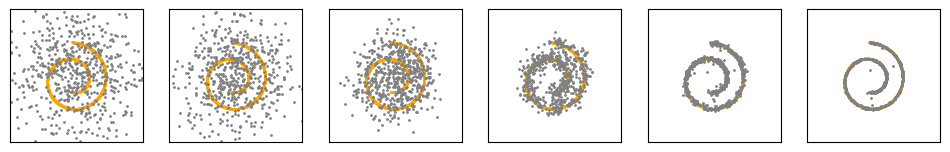

In [27]:
from dataset_utils import generate_2d_swiss_roll
dataset = generate_2d_swiss_roll(int(1e3), rescaled=True, return_as_tensor=False)[1]

from prior_utils import p_sample_loop, plot_reverse_samples_10_steps
from utils import remove_all_ticks_and_labels
sample_size = 1e3
embedding_dims = 2
sample_size = int(6e2)
lims = [-2,2]

temps = [0, 20, 50, 70, 90, 100]

x_seq = p_sample_loop(model, (sample_size, embedding_dims), num_steps, device, normalized_beta_schedule=False)
print(x_seq.shape)
fig, axes = plt.subplots(1, len(temps), figsize=(12, 2), sharey=True)
for t, temp in enumerate(temps):
    cur_x = x_seq[temp].detach().cpu()
    ax = axes[t]
    ax.scatter(*dataset.T, c='orange', s=1)
    ax.scatter(*cur_x.T, s=1, color='grey')
    ax.set_aspect('equal')
    ax.set(xlim=lims, ylim=lims)
    remove_all_ticks_and_labels(ax)